### Machine Learning Pipeline

1. Task - Understand
2. Data - Look at Source
3. Modeling - Build ML Models from Data
4. Error Measurement - Choose right Error functions for the learning process
5. Training and Optimisation
6. Performance Measurement - of model
7. Validate and Test - model
8. Corrective measures


## Task Understanding

Correctly classifying whether input cell contains malaria parasite or not

## Data Preparation

We use malaria dataset in TensorFlow Dataset Catalog --> Image Classification --> malaria

https://www.tensorflow.org/datasets/catalog/overview

malaria dataset Description:

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.

In [1]:
# To load an online dataset, we use the tfds.load() method in tensorflow_datasets
# For first time, run pip install tensorflow_datasets, run it one or two times to ensure proper installation

import tensorflow as tf             # models
import numpy as np                  # math computations
import matplotlib.pyplot as plt     # plots

import tensorflow_datasets as tfds  # DATASETS


c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset, datasetinfo = tfds.load('malaria', withinfo=True, assupervised=True, shuffle_files=True, split=['train'])  # as we only have 'train' split in data, we will have to do 'test' split manuallt

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.16s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.34s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.46s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.57s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.67s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.77s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.88s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:55<00:00, 235.98s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.08s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.19s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.29s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.39s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.49s/ url]

Dl Completed...: 100%|██████████| 1/1 [03:56<00:00, 236.61s/ url]

Dl Completed...: 100%|

Dataset malaria downloaded and prepared to C:\Users\z644252\tensorflow_datasets\malaria\1.0.0. Subsequent calls will reuse this data.


In [2]:
dataset, dataset_info = tfds.load(      # wrote again as I want to keep the graphs to remind myself how long it took to extract the 13779+13779 images
    'malaria', 
    with_info=True, 
    as_supervised=True, 
    shuffle_files=True, 
    split=['train']) 

Above Dataset takes very long to download so download it before class please!

The tdfs.load() method from tensorflow_datasets library helps us download official datasets. malaria dataset has 13779 + 13779 images so it takes roughly 3-4 hours to download and extract. But once done it will be immediately usable

The tdfs_load function returns dataset and dataset_info which in the Data API format we saw in last class

In [3]:
dataset

[<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='C:\\Users\\z644252\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in th

In [5]:
for data in dataset[0].take(1):     # dataset[0] means dataset['train'] the only split in the dataset
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


### Skip and Take

We are using these methods to create TRAIN, VAL, TEST sets. These mehods help us 'take' or 'skip' certain values.

We can see which indices we skipped, from the array returned by list(DATASET.as_numpy_iterator()) method

In [6]:
# skip
dataset = tf.data.Dataset.range(10)
dataset = dataset.skip(7)
list(dataset.as_numpy_iterator())

[7, 8, 9]

In [7]:
# take
dataset = tf.data.Dataset.range(10)
dataset = dataset.take(7)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6]

In [8]:
TRAIN_RATIO  = 0.8
VAL_RATIO  = 0.1
TEST_RATIO  = 0.1

dataset = tf.data.Dataset.range(10)
print(dataset.as_numpy_iterator())
print(len(dataset))     # As we have 10 elements, we should get output 10


DATASET_SIZE = len(dataset)
train_dataset = dataset.take(int(0.8*DATASET_SIZE))    # wrapped an int as it was suggested in the error handling for float*int=float multiplication
print(list(train_dataset.as_numpy_iterator()))

10
[0, 1, 2, 3, 4, 5, 6, 7]


To write the above code more cleanly

In [9]:
dataset = tf.data.Dataset.range(10)

TRAIN_RATIO  = 0.8
VAL_RATIO  = 0.1
TEST_RATIO  = 0.1
DATASET_SIZE = len(dataset)

train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))         # TAKE the first ratio of rows, TRAIN_RATIO*DATASET_SIZE, in the INITIAL dataset
print(list(train_dataset.as_numpy_iterator()))

VAL_TEST_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))      # first, SKIP the first ratio of rows, TRAIN_RATIO*DATASET_SIZE, in the INITIAL dataset

val_dataset = VAL_TEST_dataset.take(int(VAL_RATIO*DATASET_SIZE))    # then, TAKE the val ratio of rows, VAL_RATIO*DATASET_SIZE, from VAL_TEST_dataset
print(list(val_dataset.as_numpy_iterator()))

test_dataset = VAL_TEST_dataset.skip(int(VAL_RATIO*DATASET_SIZE))   # then, SKIP the val ratio of rows, VAL_RATIO*DATASET_SIZE, on the VAL_TEST dataset
print(list(test_dataset.as_numpy_iterator()))

# we wrapped an int in all take() and skip() methods because it requires an int input
# but RATIO*SIZE is actually, float*int=float multiplication. So we wrapped an int to change the type

[0, 1, 2, 3, 4, 5, 6, 7]
[8]
[9]


To write the above code more cleanly, we make a function out of it

In [10]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))         # TAKE the first ratio of rows, TRAIN_RATIO*DATASET_SIZE, in the INITIAL dataset

    VAL_TEST_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))      # first, SKIP the first ratio of rows, TRAIN_RATIO*DATASET_SIZE, in the INITIAL dataset

    val_dataset = VAL_TEST_dataset.take(int(VAL_RATIO*DATASET_SIZE))    # then, TAKE the val ratio of rows, VAL_RATIO*DATASET_SIZE, from VAL_TEST_dataset

    test_dataset = VAL_TEST_dataset.skip(int(VAL_RATIO*DATASET_SIZE))   # then, SKIP the val ratio of rows, VAL_RATIO*DATASET_SIZE, on the VAL_TEST dataset

    return train_dataset, val_dataset, test_dataset


So now we can split the dataset bery cleanly through the funcion we made like:

In [11]:
TRAIN_RATIO  = 0.8
VAL_RATIO  = 0.1
TEST_RATIO  = 0.1

dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
# print(train_dataset, val_dataset, test_dataset)
print(
    list(train_dataset.as_numpy_iterator()), 
    list(val_dataset.as_numpy_iterator()), 
    list(test_dataset.as_numpy_iterator())
)

[0, 1, 2, 3, 4, 5, 6, 7] [8] [9]


Now getting back to malaria Dataset

In [12]:
dataset, dataset_info = tfds.load(      # wrote again as I want to keep the graphs to remind myself how long it took to extract the 13779+13779 images
    'malaria', 
    with_info=True, 
    as_supervised=True, 
    shuffle_files=True, 
    split=['train']) 

In [13]:
TRAIN_RATIO  = 0.8
VAL_RATIO  = 0.1
TEST_RATIO  = 0.1

dataset, dataset_info = tfds.load(
    'malaria', 
    with_info=True, 
    as_supervised=True, 
    shuffle_files=True, 
    split=['train']) 

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)   # dataset gas a train split [] within itself, so use 0 to index it

print(
    list(train_dataset.take(1).as_numpy_iterator()),    # Taking, and Printing only first one element to save time and check if it works
    list(val_dataset.take(1).as_numpy_iterator()),      # Taking, and Printing only first one element to save time and check if it works
    list(test_dataset.take(1).as_numpy_iterator())       # Taking, and Printing only first one element to save time and check if it works
)

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

## Data Visualization

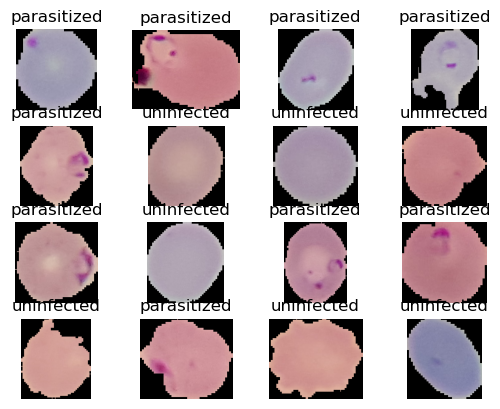

In [14]:
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

To see which labels, the data has, run thi:

In [15]:
dataset_info.features['label'].int2str(0)

'parasitized'

In [16]:
dataset_info.features['label'].int2str(1)

'uninfected'

## Data Processing

First Resizing the images, then Normalizing the images

subtracting mean and dividing by standard_deviation is actually STANDARDISATION

subtracting the min_value, dividing by (max_value - min_value) is actually NORMALISATION

To STANDARDISE or NORMALISE our image dataset depends on the images themselves

If most of the image pixels lie around a mean value, then Standardise, otherwise if pixel values are DIFFERENT from one another, then normalise

For our case now, we will use NORMALIZATION, where min_value = 0, max_value = 255, normalized_value = (X-0)/(255-0) = X/255

In [17]:
# Function for Resizing use tf.image.resize() via .map()
# Rescaling achieved by dividing by 255, as explained above

IM_SIZE = 224

def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [18]:
train_dataset = train_dataset.map(resize_rescale)

In [19]:
for image, label in train_dataset.take(1):
     print(image, label)    #observe, now all the image shapes will be (224,224, x)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [20]:
# Data Shuffling, Batching, Prefetching, for speed gain

train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

## How and Why ConvNets work

For each image of 224 * 224 * 3 = 150,528 parameters (pixels) to be trained in input layer

in fully connected layer if we have 1000 neurons = = 150,528,000 parameters to be trained in fully connected layer (considering only the weights parameters, and ignoring the biases parameters)

Hence we realize that Fully Connected Layers are not scalable, since when we increase the features, the total number of parameters increase considerably

So we use the 'convolutional layer', where each neuron is not connected to ALL previous neurons like Fully Connected layer, withthe help of a kernel filter that passes over the inputs.

so a 4 * 4 image can be represented as a 2 * 2 image with:

1. A Fully Connected layer like this 16 pixels to 4 pixels = 16 * 4 = 64 parameters, versus,

2. A Convolutional layer, where a  a kernel of 3 * 3 is passed over the input image. So in total 3 * 3 = 9 parameters only



So in Convolutional layers, kernels pass over the image. 
Smaller the kernel, more (complex) features are extracted, takes more time. 
Larger the kernel,  larger input features extracted, takes less time.

Generally a kernel size of 3 is used, as it is a good balance between large and small kernels

How to know width and height of output layer? Use this formula to quickly calculate, F is the size of square kernel (one side of it, so 4 * 4 kernel, F = 4):

W_out = W_in - F + 1

H_out = H_in - F + 1

Does that mean that out Output layer is always smaller than Input Layer?

NO. Well, generally yes, Output layer is smaller than Input Layer, per se. 

BUT if you do PADDING, you can achieve Output layer  sizes that are BIGGER than Input Layer

Padding also has another benefit. It helps corner and edge features in the image, have more influence in the output layer.

For example, if an feature (like face of man) is in the center of an image, our kernel will pass over it multiple times, and hence this feature will have a lot of influence in the output layer

But if our feature is in the corner or edge of an image, our kernel might only pass over it just once. Hence it will have very weak influence on the output layer. To overcome this limitation, we can use padding, and the kernel will pass over the corner and edge feature more times, an will contribute more influence of these fwatures in the output layer.

A Stride refers to how many pixels the kernel moves for the next feature extraction. Usually the stride is one, so the kernel moves to adjacent feature set in steps of one pixel length at a time, but these can be adjusted according to our use case.

But remember, increasing the stride size, reduces the output layer size, as we wouldnot be extracting as many features

So now, How to know width and height of output layer, taking into account, the padding and stride? Use this formula to quickly calculate:

W_out = (W_in + 2P - F) / S + 1

H_out = (H_in + 2P - F) / S + 1


W_in or H_in is input image width/height, BEFORE padding

P is the amount of pixels, padded on one side of the image (therefore 2P is used, since we pad on both sides of the image),

F is the size of square kernel (one side of it, so 4 * 4 kernel, F = 4), 

S is the Stride length (basically number of pixels, the kernel moves per step of feature extraction)

When you don't know the exact padding to use to get a particular output size, you could set the padding flag as VALID. Then TensorFlow automatically calculates the Padding for you such that the output you want matches up.

Now in real life we don't have 2d images, in the sense, images with 1 channels only. Rather, we have 3D images, in the sense, images with 3 channels R, G, B.

The Kernel passes through each channel simultaneously, and a dot product + bias is done between image and kernel. Then the same is calculated for the remaining channels, and all the resultant values are added up all channels (here kernel(R) + kernel(G) + kernel(B)). Then the kernel moves by a stride length and the process repeats.

the output is a 1 channel output, which has features extracted from all 3 channels input

Now the difference beteen FILTERING (for eg, edges, or blurring etc) and CONVOLUTIONAL LAYER, is that in Filtering we know what values the kernel has. In CNN the kernel is randomly initialized, and the model learns the actual values during training

Note: for an image of N channels, evenits Filter WILL HAVE N CHANNELS

so an image 64 * 64 * 3, can have a Filter F which is of size 5 and 3 channels, namely 5 * 5 * 3

As the number of filters to be passed over the input image increase, for e.g. 2 , 3, 4, 5, 6 filters etc, then even the channels are considered. For 6 Filters to be passed , we will have 6 * (5 * 5 * 3) filters, 

In terms of parameters to be trained,  we have 6 * (5 * 5 * 3)  weight parameters i,e., 6 * 75, i.e., 450 weight parameters (encompassing all channels). We also have a bias parameter per filter so totally 6 bias parameters. And a grand total of 456 trainable parameters 

The pooling layer reduces the feature map (aka output layer) by increasing stride / kernel size. Mainly by stride, as output layer size is determined by dividing by the stride (see formula written above for W_out, H_out), i.e. inversely proportionality. Kernel is just subtracted so not such strong influence

max pooling = take max of kernel features

average pooling = take average of kernel features

When a layer id FLATTENED, all pixels across all channels are assembled in a verticle line, ready to be Fully connected to the next layer.

E.g., a (13 * 13 * 16) layer, has 16 channels of images, of size (13 * 13) each. When we flatten this we get a layer of 13 * 13 * 16 pixels, i.e., 2704 pixels 

The output layer is a layer of outputs. Lol. 

For eg, in our malaria dataset, the output layer has only 2 neurons: Parasited or Uninfected

In a general CNN, the first few layers are for feature extraction. The outputs here, are still humanly interpretable.

The next few layers are for classification, the outputs here are generally not humanly interpretable

To do convolutional layers in TensorFlow, we can use tf.keras API

Basically tf.keras.layers.Conv2D

the strides=(1, 2) flag means, stride_heightwise = 1, stride_widthwise = 1

padding flag: can be set to	one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. 

If you want output featuremap size same as input featuremap size, put padding="same" and strides=1. Padding = 'same' means that.

data-format flag: Whether to set the default (Height, Width, Channels) aka (H,W,C) aka 'channels_last' format while referring to images, or other formats like (C,H,W) aka set as 'channels_first'

dilation flag: when 3x3 filter becomes 5x5 or 7x7 or 9x9, based on the spaces you insert between kernel pixels (along both height and width of kernel)

## Building ConvNets in TensorFlow

In [21]:
lenet_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    
    tf.keras.layers.Conv2D(
        filters = 6,
        kernel_size = 5,
        strides=(1, 1),     # can also be written as strides=1, since both height and width strides are equal
        padding='valid',
        activation='sigmoid',
    ),                      # REMEMBER THE COMMA AFTER EACH LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYNTAX OF CONV2D AND MAXPOOL INSTEAD
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,          # can also be written as strides=(2,2), since both height and width strides are equal
    ),                      # REMEMBER THE COMMA AFTER EACH LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYNTAX OF CONV2D AND MAXPOOL INSTEAD


    tf.keras.layers.Conv2D(
        filters = 16,
        kernel_size = 5,
        strides=(1, 1),     # can also be written as strides=1, since both height and width strides are equal
        padding='valid',
        activation='sigmoid',
    ),                      # REMEMBER THE COMMA AFTER EACH LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYNTAX OF CONV2D AND MAXPOOL INSTEAD
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,          # can also be written as strides=(2,2), since both height and width strides are equal
    ),                      # REMEMBER THE COMMA AFTER EACH LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYNTAX OF CONV2D AND MAXPOOL INSTEAD

    tf.keras.layers.Flatten(),   # converts nD output to 1D output, vertical line, ready for next fully connected layer
                            # REMEMBER THE COMMA AFTER EACH LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYNTAX OF CONV2D AND MAXPOOL INSTEAD
    tf.keras.layers.Dense(1000, activation = 'sigmoid'),  # Dense(1000), activation function added for increasing model complexity
    tf.keras.layers.Dense(100, activation = 'sigmoid'),   # Dense(100), activation function added for increasing model complexity
    tf.keras.layers.Dense(2, activation = 'sigmoid'),     # Dense(2), activation function added for increasing model complexity
])
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 1000)              4

More clean way to write above code, just import all needed layers from tensorflow.keras.layers

In [22]:
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
 # REMEMBER THE COMMA AFTER EACH SEQUENTIAL LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYTAX OF CONV2D AND MAXPOOL INSTEAD

lenet_model = tf.keras.Sequential([
    
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    
    Conv2D(filters = 6, kernel_size = 5, strides=(1, 1), padding='valid', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Conv2D(filters = 16, kernel_size = 5, strides=(1, 1), padding='valid', activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Flatten(),   # converts nD output to 1D output, vertical line, ready for next fully connected layer
    
    Dense(100, activation = 'sigmoid'),  # Dense(1000), activation function added for increasing model complexity
    Dense(10, activation = 'sigmoid'),   # Dense(100), activation function added for increasing model complexity
    Dense(1, activation = 'sigmoid'),    # Dense(1), because output is either 0 or 1, if we keep Dense(2) we get:
                                         # ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).

])
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 100)              

## Binary Crossentropy Loss (Error Sanctioning)

In [24]:
# Example 1: (batch_size = 1, number of samples = 4)
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, -12.8]
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True) # from_logits=True is done when our inputs are not in range 0 to 1, to bring them in the range 0 to 1
bce(y_true, y_pred).numpy()


0.865458

In [25]:
lenet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # metrics = tf.keras.metrics.RootMeanSquaredError(),
)

## Training the CNN model

In [26]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100


c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


689/689 [==============================] - ETA: 0s - loss: 0.7028

ValueError: in user code:

    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, None, 3)


After the training on first epoch was COMPLETED, the the error popped up

THis gives us the indication that the problem is in the validation dataset

on looking back up, we reaalise that the shape of train_dataset, and val_dataset is not the same.

the val_dataset has not been resized and rescalled

Let's demonstrate this

In [27]:
train_dataset # shape=(None, 224, 224, 3)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [28]:
val_dataset # shape=(None, None, 3)

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
TRAIN_RATIO  = 0.8
VAL_RATIO  = 0.1
TEST_RATIO  = 0.1

dataset, dataset_info = tfds.load(
    'malaria', 
    with_info=True, 
    as_supervised=True, 
    shuffle_files=True, 
    split=['train']) 

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)   # dataset has a train split [] within itself, so use 0 to index it

In [30]:
# Let's fix it, but remember you can run resize _rescale only once, you run it twice and code will break
#  thats why we split the code from scratch
# Resize_Rescale for all Datasets TRAIN, VAL, TEST comes BEFORE shuffling+Batching, NOT AFTER, 
# because batching will create batches, and their shapes will not remain the same for comparison. There wll be another dimenson added to the dataset

train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)


In [31]:
BUFFER_SIZE = 8
BATCH_SIZE = 32

train_dataset = train_dataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# We basically don't have to shuffle the test set, but we need to batch it to be consistent with the shapes or train_dataset and val_datset
test_dataset = test_dataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [32]:
train_dataset   # Observe shape and compare with val_dataset, the None exists because of the .batch(). Each subsequent batching will add more Nones

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [33]:
val_dataset     # Observe shape and compare with train_dataset, the None exists because of the .batch(). Each subsequent batching will add more Nones

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [34]:
test_dataset    # Observe shape and compare with above datasets, the None exists because of the .batch(). Each subsequent batching will add more Nones

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [35]:
lenet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # metrics = tf.keras.metrics.RootMeanSquaredError(),
)

In [ ]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)


Epoch 1/100


c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


689/689 [==============================] - ETA: 0s - loss: 0.7060

ValueError: in user code:

    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\z644252\AppData\Local\mambaforge\envs\learn_tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, None, 3)


As we can see the model is training very slowly. Here are some ways to speed up the process:

1. Take out the validation_data during training
2. use a smaller kernel size, here use 3 instead of 5
3. Use 'relu' instead of 'sigmoid' activation function, except, in last layer use sigmoid, as we need 0 or 1 output


In [36]:
 # REMEMBER THE COMMA AFTER EACH SEQUENTIAL LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYTAX OF CONV2D AND MAXPOOL INSTEAD

lenet_model = tf.keras.Sequential([
    
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    
    Conv2D(filters = 6, kernel_size = 3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Conv2D(filters = 16, kernel_size = 3, strides=(1, 1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Flatten(),   # converts nD output to 1D output, vertical line, ready for next fully connected layer
    
    Dense(100, activation = 'relu'),  # Dense(1000), activation function added for increasing model complexity
    Dense(10, activation = 'relu'),   # Dense(100), activation function added for increasing model complexity
    Dense(1, activation = 'sigmoid'),    # Dense(1), because output is either 0 or 1, if we keep Dense(2) we get:
                                         # ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).

])
lenet_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [37]:
lenet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # metrics = tf.keras.metrics.RootMeanSquaredError(),
)

In [ ]:
history = lenet_model.fit(train_dataset, epochs = 100, verbose = 1)


Epoch 1/100
363/689 [==============>...............] - ETA: 21s - loss: 0.8263

: 

: 

Again we see that training is really slow, let's get back under the good, and try to change things to make it faster:

Now we will add BatchNormalization Layers after almost each layer, where the values in the batch are subtracted by batch_mean, and divided by batch_stddev

And we will reduce epochs to 20, from current 100

also since our model is training properly now (albeit slow), we can now activate the performance measurement flag 'metrics' in .compile() function

We will also add the validation_data flag back to the model training

for performance measurement we will use 'accuracy', which means: Total number of times that model predicted an output correctly, divided by the total number of predictions.

let's say we have model A, and another model say model B, each carry out say 1000 predictions. Now, if model A does 800 correct predictions, then its accuracy is 800 divided by 1000, aka 80% accuracy. If model B, does 980 correct predictions, it has an accuracy of 98%. Then, model B outperforms model A.

It should be noted that the accuracy isn't always the only choice for a performance metric, when it comes to classification problems as others like the precision, the recall, the F1 score, and many others exist.

In [38]:
from tensorflow.keras.layers import BatchNormalization

In [39]:
 # REMEMBER THE COMMA AFTER EACH SEQUENTIAL LAYER, WASTED 1 HR OF MY LIFE TRYING TO FIND THE ERROR IN SYTAX OF CONV2D AND MAXPOOL INSTEAD

lenet_model = tf.keras.Sequential([
    
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    
    Conv2D(filters = 6, kernel_size = 3, strides=(1, 1), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Conv2D(filters = 16, kernel_size = 3, strides=(1, 1), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2,),         # can also be written as strides=(2,2), since both height and width strides are equal

    Flatten(),   # converts nD output to 1D output, vertical line, ready for next fully connected layer
    
    Dense(100, activation = 'relu'),  # Dense(1000), activation function added for increasing model complexity
    BatchNormalization(),
    Dense(10, activation = 'relu'),   # Dense(100), activation function added for increasing model complexity
    BatchNormalization(),
    Dense(1, activation = 'sigmoid'),    # Dense(1), because output is either 0 or 1, if we keep Dense(2) we get:
                                         # ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).

])
lenet_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [40]:
lenet_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = 'accuracy',
)

In [41]:
history = lenet_model.fit(train_dataset, validation_data=val_dataset, epochs = 20, verbose = 1)

Epoch 1/20


689/689 [==============================] - 65s 91ms/step - loss: 0.3734 - accuracy: 0.8372 - val_loss: 1.0134 - val_accuracy: 0.7880
Epoch 2/20
689/689 [==============================] - 63s 91ms/step - loss: 0.2358 - accuracy: 0.9151 - val_loss: 0.3589 - val_accuracy: 0.8831
Epoch 3/20
689/689 [==============================] - 66s 95ms/step - loss: 0.2112 - accuracy: 0.9265 - val_loss: 0.2888 - val_accuracy: 0.9191
Epoch 4/20
689/689 [==============================] - 67s 97ms/step - loss: 0.1846 - accuracy: 0.9380 - val_loss: 280.7064 - val_accuracy: 0.9470
Epoch 5/20
689/689 [==============================] - 69s 101ms/step - loss: 0.1921 - accuracy: 0.9357 - val_loss: 15.5025 - val_accuracy: 0.5739
Epoch 6/20
689/689 [==============================] - 70s 102ms/step - loss: 0.1758 - accuracy: 0.9419 - val_loss: 0.1720 - val_accuracy: 0.9401
Epoch 7/20
689/689 [==============================] - 69s 100ms/step - loss: 0.1615 - accuracy: 0.9467 - val_loss: 0.1488 - val_accuracy: 0.94

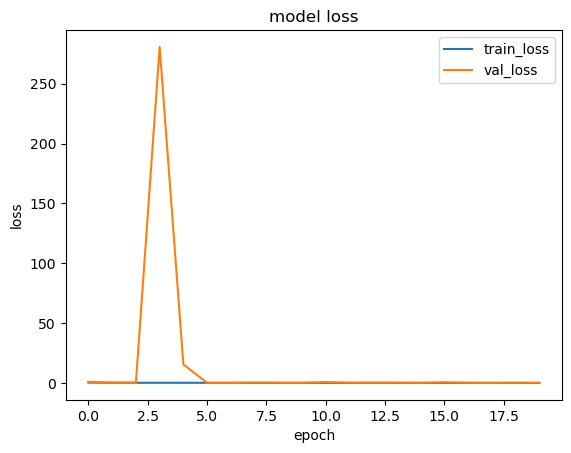

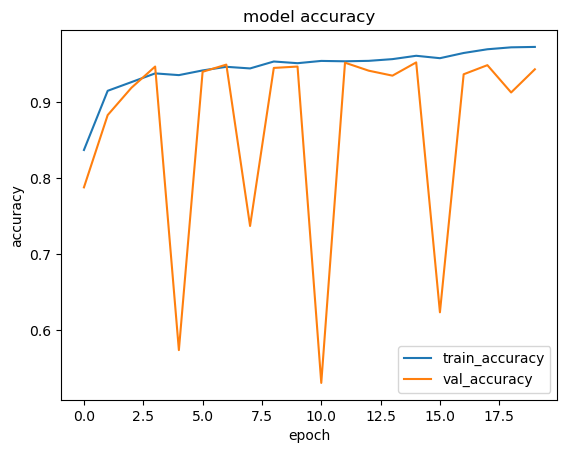

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

## Model Evaluation and Testing

In [43]:
lenet_model.evaluate(test_dataset)

87/87 [==============================] - 6s 35ms/step - loss: 0.2175 - accuracy: 0.9423


[0.2175235152244568, 0.9423286318778992]

Wow even for training only for few epochs, we have a loss around 0.2 and an accuracy close to 94%. If we train longer with more epochs, we may get more accuracy.

What we have done until now is trained our model, then passed both inputs and outputs to EVALUATE it.  Input --> Model <-- Output

Now that we have trained our model and evaluated it, our model can now make PREDICTIONS if we only pass in an input, and let our model automatically come up with the output. The predictions will say whether the image contains a parasitized cell or an uninfected cell.  Input --> Model --> Output

In [44]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 3s 3s/step


0.9963565

So basically we're told that this is an Uninfected cell, since the .predict() value is close to 1. It is NOT a percentage value of anything. (if it were closer to 0, then it would be Parasited)

Let's define this method parasite_or_not, that takes the .predict() value as input X, if X is less than 0.5, we have a parasitized cell, and if it's greater than or equal to 0.5, it's an uninfected cell. (Recall that the way the data was created was such that parasitized was zero, and then uninfected was one. So we are having a threshold value of 0.5)


In [45]:
def parasite_or_not(x):
    if(x < 0.5):
        return str('P')
    else:
        return str('U')

Let's see our parasite_or_not() function in action!

In [46]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 3s 3s/step


'P'

Wow! As expected, it is a U cell! Now let's predict on 9 different elements and have the output in a 3x3 subplot, compareing with actual labels:

1/1 [==============================] - 0s 44ms/step


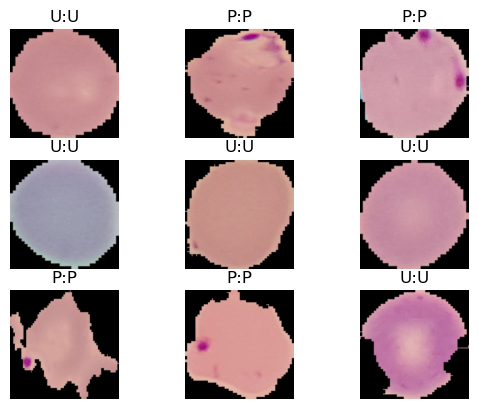

In [48]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])      # image[0] because we want to bypass the extra dimension made by batching
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0]))) # Actual label : Prediction
  
  plt.axis('off')